In [1]:
%pylab inline
from wallet.util.analysis import Analysis

Populating the interactive namespace from numpy and matplotlib


In [ ]:
##############################

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
AAPL,21.0,0.770833,1.420886,-0.789708,-0.770544,0.564964,3.284601,3.334964,0.536916,20.011133,5.838401,0.834846
QQQ,21.0,0.177547,0.510363,-0.551965,-0.508677,0.068537,1.009921,1.033606,0.332333,3.102626,4.205713,0.255250
MSFT,21.0,-0.009488,0.733154,-1.036453,-0.931994,-0.132833,1.183821,1.245533,-0.023767,-2.232416,6.077394,0.330503


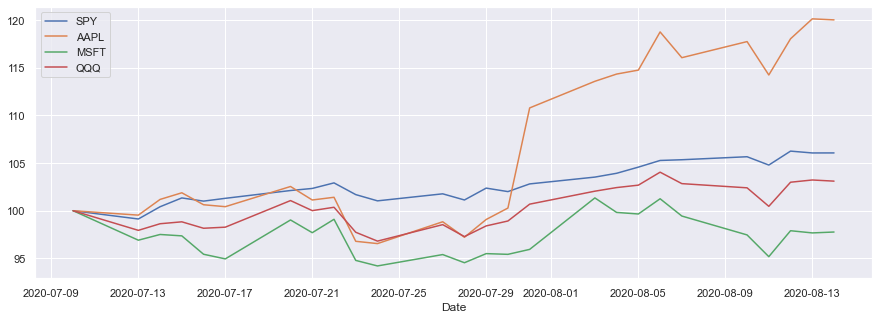

In [2]:
from pandas import DataFrame
from wallet.util.analysis import _optimize, _moving_average_statistics
portfolio = {'AAPL': .2, 'MSFT': .2, 'QQQ': .6}
ana = Analysis(['SPY',*portfolio], 21, 5)
ana.graph()

In [3]:
ana.setup_mask(['SPY', *portfolio])
start = ana.data.index[0]
data = {col: ana.data[col] * (100 / ana.data[col][start]) for col in ana.data.columns}
data['AMQ'] = sum(data[st] * sh for st, sh in portfolio.items())
for col in portfolio.keys():
    del data[col]
frame = DataFrame(data)
print(_optimize(frame.rolling(5).mean().pct_change() * 100, .008, False, True))
_moving_average_statistics(frame, 5, .008)

({'SPY': 1.0, 'AMQ': -0.2666}, 6.7414)


<ipython-input-3-3c9d1541b20a>:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  data['AMQ'] = sum(data[st] * sh for st, sh in portfolio.items())


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008577,6.061274,1.829524,-0.324698
AMQ,21.0,0.267828,0.711848,-0.619944,-0.602714,0.117730,1.514849,1.544942,0.365005,5.417319,4.667259,0.601105


,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
Portfolio,21.0,0.117676,0.612214,-0.567627,-0.555561,-0.061041,1.186591,1.195393,0.179251,1.780555,4.380116,0.751251


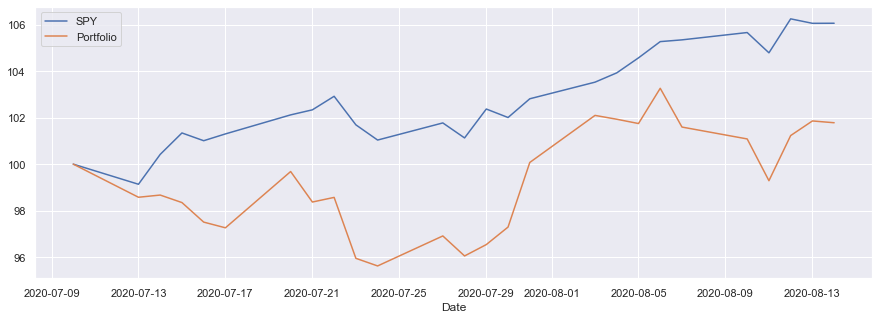

In [4]:
ana.graph({'SPY': -.60, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
Portfolio,21.0,0.092159,0.596949,-0.582158,-0.561695,-0.100184,1.125462,1.141251,0.141088,1.174427,4.483709,0.770766


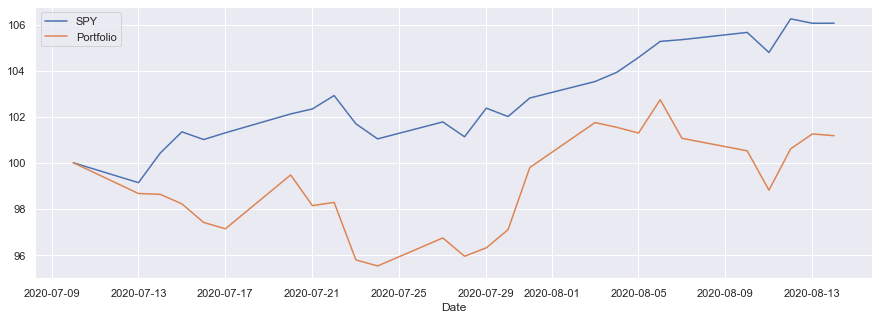

In [5]:
ana.graph({'SPY': -.70, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
Portfolio,21.0,0.066497,0.582185,-0.608776,-0.558157,-0.139426,1.063920,1.086848,0.100587,0.568300,4.587302,0.787143


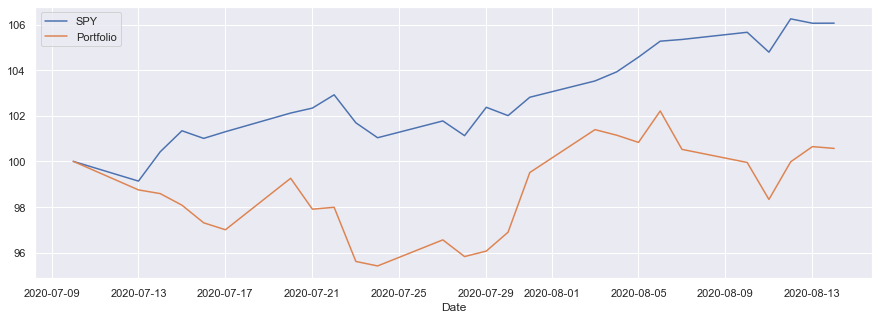

In [6]:
ana.graph({'SPY': -.80, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
Portfolio,21.0,0.040689,0.567976,-0.635414,-0.578091,-0.178768,1.001963,1.032180,0.057665,-0.037828,4.690895,0.799611


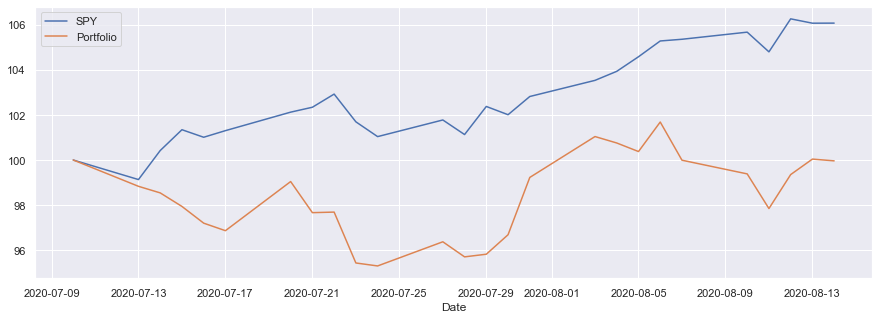

In [7]:
ana.graph({'SPY': -.90, **portfolio}, drop_components=list(portfolio))

,count,mean,std,min,5%,50%,95%,max,shrp,yield,down,skew
SPY,21.0,0.249362,0.239310,-0.237193,-0.107733,0.310467,0.593198,0.631762,1.008842,6.061274,1.829524,-0.324698
Portfolio,21.0,0.014732,0.554378,-0.662073,-0.598222,-0.218209,0.939585,0.977247,0.012259,-0.643955,4.794488,0.807329


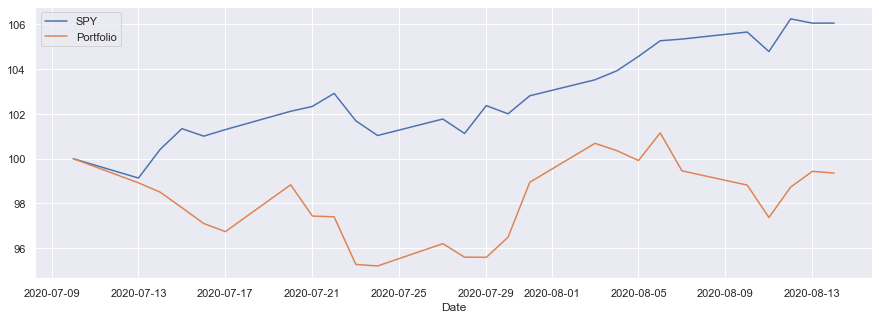

In [8]:
ana.graph({'SPY': -1.0, **portfolio}, drop_components=list(portfolio))

In [ ]:
##############################

In [ ]:
ana = Analysis(['SPY','QQQ'], 21, 5)
ana.graph()

In [ ]:
ana.drop_mask()
ana.optimize_iteration([100], max_count=2, sharpe=False, allow_short=True)

In [ ]:
ana.graph({'SPY': -0.6, 'QQQ': 1.0})

In [ ]:
ana.graph({'SPY': -0.7, 'QQQ': 1.0})

In [ ]:
ana.graph({'SPY': -0.8, 'QQQ': 1.0})